In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('investments_VC.csv',delimiter=',', header = 0, encoding = "ISO-8859-1",skipinitialspace=True)

In [4]:
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
permalink               49438 non-null object
name                    49437 non-null object
homepage_url            45989 non-null object
category_list           45477 non-null object
market                  45470 non-null object
funding_total_usd       49438 non-null object
status                  48124 non-null object
country_code            44165 non-null object
state_code              30161 non-null object
region                  44165 non-null object
city                    43322 non-null object
funding_rounds          49438 non-null float64
founded_at              38554 non-null object
founded_month           38482 non-null object
founded_quarter         38482 non-null object
founded_year            38482 non-null float64
first_funding_at        49438 non-null object
last_funding_at         49438 non-null object
seed                    49438 non-null float64
venture       

In [6]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market ',
       'funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [7]:
df.rename(columns={'market ':'market', 'funding_total_usd ': 'funding_total_usd'}, inplace = True)

In [8]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [9]:
df.duplicated().sum()

4855

In [10]:
df.loc[:, ['founded_at', 'first_funding_at']].head()

,founded_at,first_funding_at
0,2012-06-01,2012-06-30
1,NaN,2010-06-04
2,2012-10-26,2012-08-09
3,2011-04-01,2011-04-01
4,2014-01-01,2014-08-17


In [11]:
orig_df = df.copy()

In [23]:
# df = orig_df.copy()

In [12]:
time_clmns = ('founded_at','first_funding_at','last_funding_at')
for i in time_clmns:
      df[i] = pd.to_datetime(df[i], format = '%Y-%m-%d', errors = 'coerce')

In [13]:
df['age_first_funding'] = (df['first_funding_at']-df['founded_at'])/pd.Timedelta(days=365)
df['age_last_funding'] = (df['last_funding_at']-df['founded_at'])/pd.Timedelta(days=365)
df['founded_month'] = pd.DatetimeIndex(df['founded_at']).month
df['founded_quarter'] = pd.DatetimeIndex(df['founded_at']).quarter

In [14]:
df.isnull().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
market                   8824
funding_total_usd        4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15741
founded_month           15741
founded_quarter         15741
founded_year            15812
first_funding_at         4866
last_funding_at          4862
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C   

In [21]:
drop_clmns = ['permalink', 'homepage_url', 'state_code', 'region','city', 'name']
dropped_df = df.drop(labels = drop_clmns, axis=1)

In [22]:
dropped_df.columns

Index(['category_list', 'market', 'funding_total_usd', 'status',
       'country_code', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'age_first_funding', 'age_last_funding'],
      dtype='object')

In [23]:
drop_frm_clmns = ['status', 'founded_month', 'founded_year', 'market', 'country_code', 'funding_total_usd', 'age_first_funding']

for clmn in drop_frm_clmns:
    dropped_df = dropped_df[dropped_df[clmn].notna()]

In [26]:
dropped_df.isnull().sum()

category_list           0
market                  0
funding_total_usd       0
status                  0
country_code            0
funding_rounds          0
founded_at              0
founded_month           0
founded_quarter         0
founded_year            0
first_funding_at        0
last_funding_at         0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
age_first_funding       0
age_last_funding        0
dtype: int64

In [27]:
dropped_df.drop(['founded_at','first_funding_at','funding_total_usd','last_funding_at','category_list'], axis=1, inplace=True)

In [28]:
dropped_df.head()

,market,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,equity_crowdfunding,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding
0,News,acquired,USA,1.0,6.0,2.0,2012.0,1750000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079452,0.079452
2,Publishing,operating,EST,1.0,10.0,4.0,2012.0,40000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.213699,-0.213699
3,Electronics,operating,GBR,1.0,4.0,2.0,2011.0,1500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,Tourism,operating,USA,2.0,1.0,1.0,2014.0,0.0,0.0,60000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247
8,Software,operating,USA,1.0,1.0,1.0,2010.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.561644,4.561644


In [30]:
dropped_df.shape

(33147, 30)

In [32]:
dropped_df.columns

Index(['market', 'status', 'country_code', 'funding_rounds', 'founded_month',
       'founded_quarter', 'founded_year', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'age_first_funding', 'age_last_funding'],
      dtype='object')

In [33]:
dropped_df = dropped_df.drop_duplicates()
dropped_df.shape

(33117, 30)

In [40]:
for i in dropped_df.columns:
    if dropped_df[i].dtype == 'O':
        print(i)

market
status
country_code


In [41]:
dropped_df['market'].value_counts()

Software                            3521
Biotechnology                       2361
Mobile                              1423
E-Commerce                          1261
Curated Web                         1158
Enterprise Software                  997
Health Care                          819
Games                                812
Advertising                          801
Hardware + Software                  770
Clean Technology                     716
Health and Wellness                  620
Social Media                         618
Finance                              602
Education                            599
Analytics                            479
Manufacturing                        472
Security                             384
Consulting                           367
Semiconductors                       352
Hospitality                          339
Real Estate                          317
Web Hosting                          310
Fashion                              296
News            

In [62]:
country_freq = dropped_df['country_code'].value_counts().tolist()
country_ind = len([i for i in country_freq if i > 100])
country_used = dropped_df['country_code'].value_counts().keys().tolist()[:country_ind]
dropped_df['country_code'] = dropped_df['country_code'].apply(lambda i: i if i in country_used else 'Other')
# country_ind

In [63]:
dropped_df['country_code'].value_counts()

USA      22196
GBR       1901
Other     1345
CAN       1039
DEU        702
IND        646
CHN        638
FRA        621
ISR        575
ESP        410
IRL        237
SGP        230
AUS        227
NLD        222
SWE        222
ITA        211
BRA        207
KOR        194
JPN        185
RUS        172
CHE        165
CHL        158
FIN        147
DNK        141
ARG        118
BEL        106
TUR        102
Name: country_code, dtype: int64

In [65]:
sorted_indices = dropped_df['country_code'].value_counts().index
country_encoded = dropped_df['country_code'].map(dict(zip(sorted_indices, range(1, len(sorted_indices)+1))))

In [75]:
country_encoded.head(10)

0      1
2      3
3      2
4      1
8      1
10    22
12     1
13     1
14     1
15     2
Name: country_code, dtype: int64

In [82]:
# for i in range(len(country_encoded)):
#     print(dropped_df['country_code'][i])
# country_df = pd.concat((country_encoded, pd.DataFrame({'country':dropped_df['country_code']})))
# country_df.head()

dropped_df['country_code'] = country_encoded
# len(country_encoded), len(dropped_df)

In [84]:
dropped_df['country_code'].head(10)

0      1
2      3
3      2
4      1
8      1
10    22
12     1
13     1
14     1
15     2
Name: country_code, dtype: int64

In [86]:
len(dropped_df['market'].value_counts())

720

In [87]:
top20_markets = dropped_df['market'].value_counts()[:20].keys().tolist()
dropped_df['market'] = dropped_df['market'].apply(lambda i: i if i in top20_markets else 'Other')

In [88]:
dropped_df['market'].value_counts()

Other                   13985
Software                 3521
Biotechnology            2361
Mobile                   1423
E-Commerce               1261
Curated Web              1158
Enterprise Software       997
Health Care               819
Games                     812
Advertising               801
Hardware + Software       770
Clean Technology          716
Health and Wellness       620
Social Media              618
Finance                   602
Education                 599
Analytics                 479
Manufacturing             472
Security                  384
Consulting                367
Semiconductors            352
Name: market, dtype: int64

In [90]:
sorted_indices = dropped_df['market'].value_counts().index
dropped_df['market'] = dropped_df['market'].map(dict(zip(sorted_indices, range(1, len(sorted_indices)+1))))

In [91]:
dropped_df.head()

,market,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,equity_crowdfunding,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding
0,1,acquired,1,1.0,6.0,2.0,2012.0,1750000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079452,0.079452
2,1,operating,3,1.0,10.0,4.0,2012.0,40000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.213699,-0.213699
3,1,operating,2,1.0,4.0,2.0,2011.0,1500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,1,operating,1,2.0,1.0,1.0,2014.0,0.0,0.0,60000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247
8,2,operating,1,1.0,1.0,1.0,2010.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.561644,4.561644


In [92]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33117 entries, 0 to 49437
Data columns (total 30 columns):
market                  33117 non-null int64
status                  33117 non-null object
country_code            33117 non-null int64
funding_rounds          33117 non-null float64
founded_month           33117 non-null float64
founded_quarter         33117 non-null float64
founded_year            33117 non-null float64
seed                    33117 non-null float64
venture                 33117 non-null float64
equity_crowdfunding     33117 non-null float64
undisclosed             33117 non-null float64
convertible_note        33117 non-null float64
debt_financing          33117 non-null float64
angel                   33117 non-null float64
grant                   33117 non-null float64
private_equity          33117 non-null float64
post_ipo_equity         33117 non-null float64
post_ipo_debt           33117 non-null float64
secondary_market        33117 non-null float64
pro

In [106]:
new_df = dropped_df.copy()

In [107]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
new_df['status'] = le.fit_transform(new_df['status'])

In [108]:
dropped_df.head()

,market,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,equity_crowdfunding,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding
0,1,acquired,1,1.0,6.0,2.0,2012.0,1750000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079452,0.079452
2,1,operating,3,1.0,10.0,4.0,2012.0,40000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.213699,-0.213699
3,1,operating,2,1.0,4.0,2.0,2011.0,1500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,1,operating,1,2.0,1.0,1.0,2014.0,0.0,0.0,60000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247
8,2,operating,1,1.0,1.0,1.0,2010.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.561644,4.561644


In [109]:
dropped_df['status'].value_counts()

operating    28639
acquired      2763
closed        1715
Name: status, dtype: int64

In [110]:
new_df.head()

,market,status,country_code,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,equity_crowdfunding,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,age_first_funding,age_last_funding
0,1,0,1,1.0,6.0,2.0,2012.0,1750000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079452,0.079452
2,1,2,3,1.0,10.0,4.0,2012.0,40000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.213699,-0.213699
3,1,2,2,1.0,4.0,2.0,2011.0,1500000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,1,2,1,2.0,1.0,1.0,2014.0,0.0,0.0,60000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624658,0.734247
8,2,2,1,1.0,1.0,1.0,2010.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.561644,4.561644


In [111]:
new_df['total_investment'] = new_df['seed'] + new_df['venture'] +new_df['equity_crowdfunding'] + new_df['undisclosed'] + new_df['convertible_note'] + new_df['debt_financing'] + new_df['angel'] + new_df['grant'] + new_df['private_equity'] + new_df['post_ipo_equity'] + new_df['post_ipo_debt'] + new_df['secondary_market'] + new_df['product_crowdfunding']

new_df['total_investment'].describe()


count    3.311700e+04
mean     1.509654e+07
std      1.798304e+08
min      0.000000e+00
25%      1.050800e+05
50%      1.350000e+06
75%      8.462816e+06
max      3.007950e+10
Name: total_investment, dtype: float64

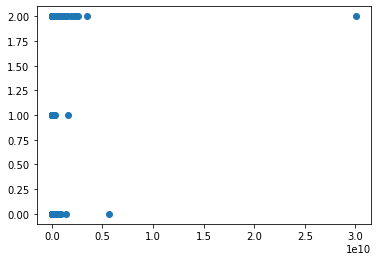

In [112]:
plt.scatter(new_df['total_investment'], new_df['status'])

In [113]:
new_df = new_df[new_df['total_investment'] < 1e9]

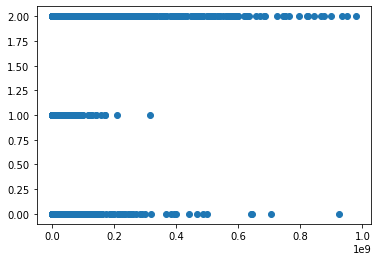

In [114]:
plt.scatter(new_df['total_investment'], new_df['status'])

In [115]:
new_df.loc[new_df['age_first_funding'] < 0, 'age_first_funding'] = 0
new_df.loc[new_df['age_last_funding'] < 0, 'age_first_funding'] = 0

In [116]:
new_df.shape

(33089, 31)

In [118]:
corr = new_df.corr()

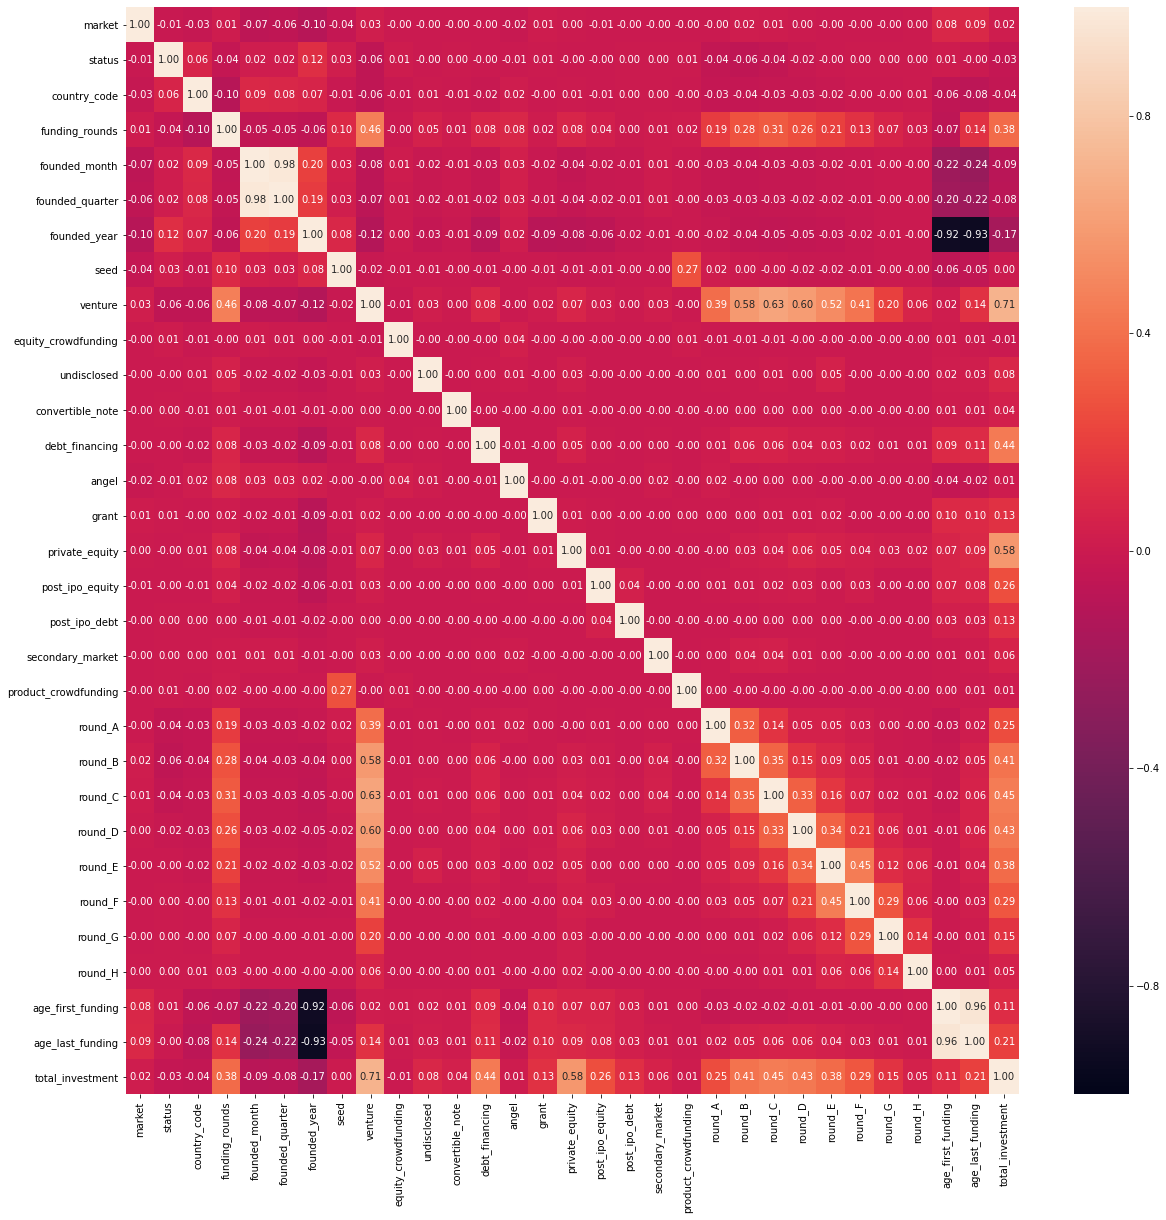

In [124]:
fig, ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(corr, annot=True, fmt = '.2f', vmin = -1, vmax=1)

In [125]:
new_df = new_df.drop(['post_ipo_equity','round_F', 'round_G','round_H','founded_year','founded_quarter'
                      ,'total_investment','age_last_funding'], axis = 1)

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [128]:
x = new_df.drop(['status'], axis=1)
y = new_df['status']

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [132]:
for i in range(10, 101, 10):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(x_train, y_train)
    print(f'{i} Trees- Train_acc: {model.score(x_train, y_train)}, Test_acc:{model.score(x_test, y_test)}')

10 Trees- Train_acc: 0.9865728348156463, Test_acc:0.8437594439407676
20 Trees- Train_acc: 0.9910197737673776, Test_acc:0.854538128336859
30 Trees- Train_acc: 0.9928330886797341, Test_acc:0.8560491588596756
40 Trees- Train_acc: 0.9946032294275106, Test_acc:0.8570565125415534
50 Trees- Train_acc: 0.9949486227441499, Test_acc:0.8570565125415534
60 Trees- Train_acc: 0.9951644935670495, Test_acc:0.8588697491689332
70 Trees- Train_acc: 0.9953371902253692, Test_acc:0.8598771028508109
80 Trees- Train_acc: 0.995380364389949, Test_acc:0.8583660723279943
90 Trees- Train_acc: 0.9952508418962093, Test_acc:0.8581646015916188
100 Trees- Train_acc: 0.9954235385545289, Test_acc:0.8599778382189986


In [135]:
final_model = RandomForestClassifier(n_estimators=100)
final_model.fit(x_train, y_train)

RandomForestClassifier()

In [136]:
y_pred_prob = final_model.predict_proba(x_test)

In [137]:
y_pred_prob

array([[0.04, 0.02, 0.94],
       [0.14, 0.08, 0.78],
       [0.06, 0.  , 0.94],
       ...,
       [0.17, 0.12, 0.71],
       [0.16, 0.01, 0.83],
       [0.11, 0.  , 0.89]])

In [138]:
y_pred = np.argmax(y_pred_prob, axis=1)

In [139]:
y_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [143]:
from sklearn.metrics import classification_report, confusion_matrix

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.03      0.05       807
           1       0.10      0.01      0.02       512
           2       0.87      0.99      0.92      8608

    accuracy                           0.86      9927
   macro avg       0.40      0.34      0.33      9927
weighted avg       0.78      0.86      0.81      9927



In [149]:
labels = le.classes_
labels

array(['acquired', 'closed', 'operating'], dtype=object)

In [150]:
import itertools

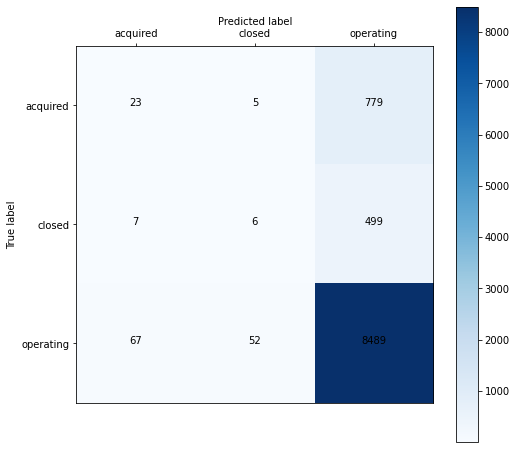

In [152]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=(8,8))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)


ax.set(xlabel="Predicted label",
     ylabel="True label",
     xticks=np.arange(n_classes),
     yticks=np.arange(n_classes), 
     xticklabels=labels,
     yticklabels=labels)

ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()

threshold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]}",
          horizontalalignment="center")

In [153]:
feature_imp = final_model.feature_importances_

In [154]:
feature_imp

array([1.10497409e-01, 6.00800798e-02, 4.21473930e-02, 7.83093247e-02,
       8.54846533e-02, 1.37961462e-01, 1.59721052e-03, 6.54884722e-03,
       3.44267454e-03, 3.07572191e-02, 3.04385487e-02, 5.54496202e-03,
       1.01116961e-02, 2.33969656e-04, 2.75078301e-05, 7.29575257e-04,
       5.47720545e-02, 4.09803320e-02, 2.46552743e-02, 1.38536382e-02,
       5.87114710e-03, 2.55955021e-01])

In [158]:
forest_importances = pd.Series(feature_imp, index=x.columns)

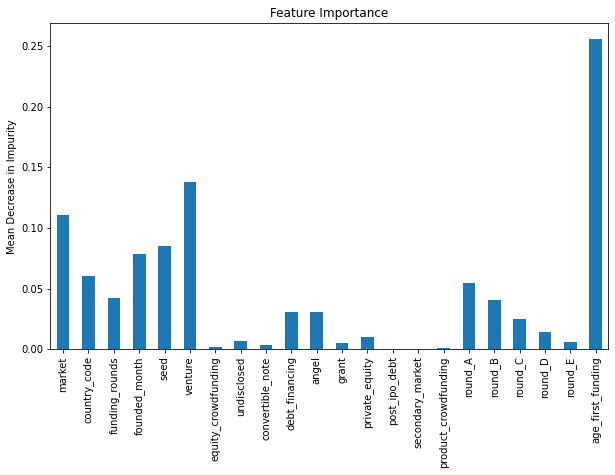

In [165]:
forest_importances.plot.bar(figsize=(10,6));
plt.ylabel('Mean Decrease in Impurity')
plt.title('Feature Importance');